In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#machine learning bit starts from here:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline


#building the model and crossvalidation pipeline:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.svm import SVR

#MOdel persistence:
import pickle

#Statsmodels


In [55]:
#import dataset
df = pd.read_csv('survey_results_public.csv')

In [56]:
#quick look at the available columns
print(df.columns)

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')


In [57]:
#select some colums for use in the analyis:
df = df[['Country', "EdLevel", 'YearsCodePro','Employment', 'ConvertedCompYearly']]
df = df.rename({"ConvertedCompYearly":"Salary"}, axis = 1)


In [58]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Employed full-time,NaN
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Independent contractor, freelancer, or self-em...",NaN


In [59]:
#remove the null values columns:
df = df[df.Salary.notnull()]
df = df[df.YearsCodePro.notnull()]
df =df.dropna()
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,17748.0
17,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,Employed full-time,46135.0


In [60]:
#restrict analysis to only fully employed respondents:
df = df[df['Employment'] == "Employed full-time"]
#df.info()

In [61]:
df['Country'].value_counts()

#reduce the length of some country names:
df.loc[df.Country =='United Kingdom of Great Britain and Northern Ireland', "Country"] = "United Kingdom"
df.loc[df.Country =='Russian Federation', "Country"] = "Russia"

df.Country.head()

9      Sweden
11      Spain
12    Germany
16     Turkey
17     Canada
Name: Country, dtype: object

In [62]:
#Because we have several countries with a single data point, I will lump those countries together under 'Other

#writing a function to shorten the cateegories:

def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i]>=cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map
        

In [63]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df.Country = df["Country"].map(country_map)
df['Country'].value_counts()

Other                       10725
United States of America     9175
India                        3385
Germany                      2753
United Kingdom               2604
Canada                       1553
France                       1396
Brazil                       1340
Spain                         890
Netherlands                   835
Australia                     825
Poland                        775
Italy                         756
Russia                        741
Sweden                        735
Turkey                        458
Switzerland                   438
Israel                        425
Norway                        402
Name: Country, dtype: int64

Text(0.5, 0.98, 'Salary (US) vs. Country')

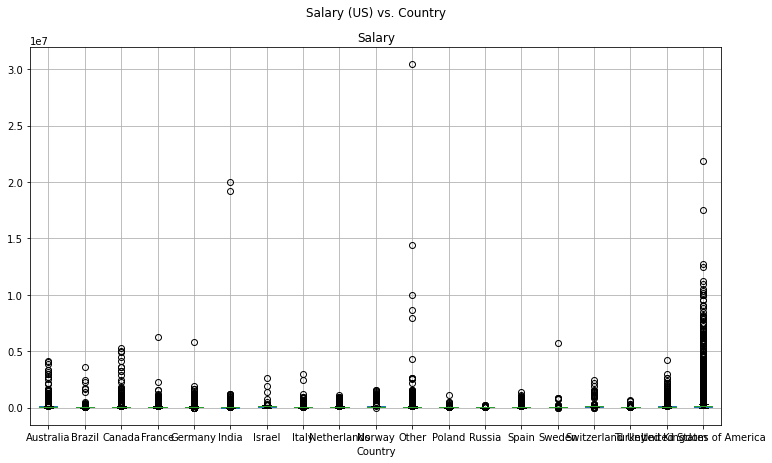

In [64]:
fig, ax = plt.subplots(1,1, figsize = (12,7))
df.boxplot('Salary', 'Country', ax = ax)
plt.suptitle("Salary (US) vs. Country")
#plt.xticks(rotation = 90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]),
 [Text(1, 0, 'Australia'),
  Text(2, 0, 'Brazil'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Germany'),
  Text(6, 0, 'India'),
  Text(7, 0, 'Israel'),
  Text(8, 0, 'Italy'),
  Text(9, 0, 'Netherlands'),
  Text(10, 0, 'Norway'),
  Text(11, 0, 'Other'),
  Text(12, 0, 'Poland'),
  Text(13, 0, 'Russia'),
  Text(14, 0, 'Spain'),
  Text(15, 0, 'Sweden'),
  Text(16, 0, 'Switzerland'),
  Text(17, 0, 'Turkey'),
  Text(18, 0, 'United Kingdom'),
  Text(19, 0, 'United States of America')])

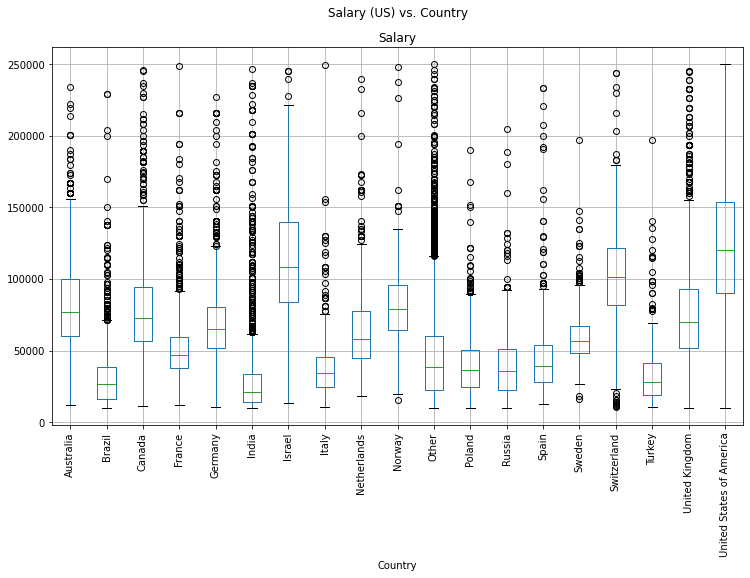

In [65]:
#Therefore attempt to cut off the salary at the 1m mark and get the boxplot again:

df = df[(df.Salary <= 250000) & (df.Salary>=10000)]
fig, ax = plt.subplots(1,1, figsize = (12,7))
df.boxplot('Salary', 'Country', ax = ax)
plt.suptitle("Salary (US) vs. Country")
plt.xticks(rotation = 90 )



In [66]:
df3 = df

def remove_outliers_per_Country(name, value, df2):
    df2 = df2.drop(df[(df.Country == name) & (df2.Salary >=value)].index)
    return(df2)

In [67]:
df =  remove_outliers_per_Country('Australia', 160000, df )

df =  remove_outliers_per_Country('Brazil', 70000, df )

df =  remove_outliers_per_Country('Canada', 150000, df )

df =  remove_outliers_per_Country('France', 90000, df )

df =  remove_outliers_per_Country('Germany', 125000, df )

df =  remove_outliers_per_Country('India', 60000, df )

df =  remove_outliers_per_Country('Israel', 225000, df )

df =  remove_outliers_per_Country('Italy', 75000, df )

df =  remove_outliers_per_Country('Netherlands', 125000, df )

df =  remove_outliers_per_Country('Norway', 140000, df )

df =  remove_outliers_per_Country('Other', 110000, df )

df =  remove_outliers_per_Country('Poland', 80000, df )

df =  remove_outliers_per_Country('Russia', 90000, df )

df =  remove_outliers_per_Country('Spain', 90000, df )

df =  remove_outliers_per_Country('Sweden', 95000, df )

df =  remove_outliers_per_Country('Switzerland', 130000, df )

df =  remove_outliers_per_Country('Turkey', 60000, df )

df =  remove_outliers_per_Country('United Kingdom', 155000, df )

df =  remove_outliers_per_Country('United States of America', 260000, df )



(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]),
 [Text(1, 0, 'Australia'),
  Text(2, 0, 'Brazil'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Germany'),
  Text(6, 0, 'India'),
  Text(7, 0, 'Israel'),
  Text(8, 0, 'Italy'),
  Text(9, 0, 'Netherlands'),
  Text(10, 0, 'Norway'),
  Text(11, 0, 'Other'),
  Text(12, 0, 'Poland'),
  Text(13, 0, 'Russia'),
  Text(14, 0, 'Spain'),
  Text(15, 0, 'Sweden'),
  Text(16, 0, 'Switzerland'),
  Text(17, 0, 'Turkey'),
  Text(18, 0, 'United Kingdom'),
  Text(19, 0, 'United States of America')])

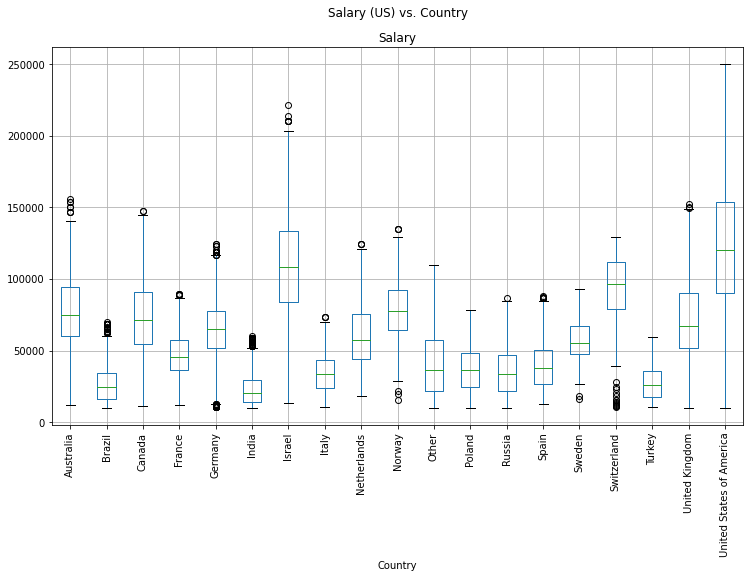

In [68]:
#Therefore attempt to cut off the salary at the 1m mark and get the boxplot again:

df = df[(df.Salary <= 250000) & (df.Salary>=10000)]
fig, ax = plt.subplots(1,1, figsize = (12,7))
df.boxplot('Salary', 'Country', ax = ax)
plt.suptitle("Salary (US) vs. Country")
plt.xticks(rotation = 90 )

In [69]:
#clean the yearsCodePro column

df.YearsCodePro.unique()

array(['4', '5', '6', '2', '18', '21', '16', '10', 'Less than 1 year',
       '3', '15', '1', '12', '8', '17', '14', '34', '11', '25', '24', '7',
       '22', '13', '9', '20', '26', '23', '39', '27', '30', '19', '35',
       '33', '37', '43', '40', '29', '38', '31', '42', '28', '46', '32',
       '36', '47', '45', '44', '41', 'More than 50 years', '50', '49',
       '48'], dtype=object)

In [70]:

def clean_years(x):
    if x == "More than 50 years":
        return 50
    if x == "Less than 1 year":
        return 0.5
    return float(x)

df.YearsCodePro = df.YearsCodePro.apply(clean_years)

In [71]:
#clean the education level:
df.EdLevel.unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)', 'Something else',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],
      dtype=object)

In [72]:
def clean_education(x):
    if "Bachelor’s degree" in x:
        return "Bachelors"
    if "professional degree" in x or 'doctoral degree' in x:
        return "Post-grad"
    return "No bachelors"

df.EdLevel = df.EdLevel.apply(clean_education)
df.EdLevel.unique()

array(['No bachelors', 'Bachelors', 'Post-grad'], dtype=object)

In [73]:
df = df.drop("Employment", axis = 1)

In [74]:
df.reset_index(inplace = True, drop = True)
#df.to_csv("Cleandata.csv")

#save the cleandata to pickle file
pd.to_pickle(df, "./cleandata.pkl")

In [75]:
X = df.drop("Salary", axis = 1)
y = df["Salary"]

#split the data into 80/20 train test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2022)

In [76]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(30423, 3)
(30423,)
(3381, 3)
(3381,)


In [77]:
y_train = np.asarray(y_train).reshape(-1,1)
y_test = np.asarray(y_test).reshape(-1,1)

print(y_train.shape)
print(y_test.shape)

(30423, 1)
(3381, 1)


In [78]:
#one-hot encode the categorical variables:

ohe = OneHotEncoder(handle_unknown = 'ignore')
scaler = StandardScaler()
modelsvr = SVR()


In [79]:

ohe.fit(X_train)
column_trans = make_column_transformer((ohe,["Country", "EdLevel"]), remainder= 'passthrough')

In [80]:
X_train_tester = X_train
X_train = pd.DataFrame(column_trans.fit_transform(X_train).toarray())
X_test = pd.DataFrame(column_trans.fit_transform(X_test).toarray())
y_train_scaled = scaler.fit_transform(y_train)


#convert Y_trained scale into dimension that gridsearch works with:
y_train_scaled = np.ravel(y_train_scaled)


In [81]:

viewer = pd.DataFrame(X_train)
print(X_train)

        0    1    2    3    4    5    6    7    8    9   ...   13   14   15  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
30418  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
30419  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
30420  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
30421  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
30422  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

        16   17   18   19   20   21    22  
0      

In [82]:
#

In [83]:

#gridsearch:
params =  {'kernel' : ['rbf'],
                    'C' : [1],
                    'degree' : [3],
                    'coef0' : [0, 0.01],
                    'gamma' : ['auto']}

modelsvr = SVR()
grid = GridSearchCV(modelsvr, param_grid = params, cv = 5,
                    scoring='neg_mean_squared_error')

grid.fit(X_train, y_train_scaled)

print(grid.best_params_)
print(grid.best_estimator_)


{'C': 1, 'coef0': 0, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}
SVR(C=1, coef0=0, gamma='auto')


In [84]:
model = SVR(**grid.best_params_)
model.fit(X_train, y_train_scaled)

SVR(C=1, coef0=0, gamma='auto')

In [85]:

y_pred = model.predict(X_test)
print(y_pred)

#inverse scale the y_pred values:
y_pred = y_pred.reshape(-1,1)
y_pred = scaler.inverse_transform(y_pred)
print(y_pred)


[ 0.62699099 -0.49658369 -0.64813614 ...  0.01762497  0.32823069
  1.32809198]
[[ 98186.97206038]
 [ 45254.01711393]
 [ 38114.19935128]
 ...
 [ 69479.00582058]
 [ 84112.01474455]
 [131216.68252361]]


In [86]:
print(metrics.r2_score(y_test, y_pred))
print(metrics.mean_absolute_percentage_error(y_test, y_pred))
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_gamma_deviance(y_test,y_pred))
print(metrics.max_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.6590310508450028
0.3603760055506055
19001.114896236482
0.1737675302669472
157945.906995364
27010.284551287892


In [87]:
#using the decision tree regressor:
from sklearn.tree import DecisionTreeRegressor


max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}
regressor = DecisionTreeRegressor(random_state= 0, )
gs = GridSearchCV(regressor, parameters, scoring = 'neg_mean_squared_error', cv =5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [88]:
regressor = gs.best_estimator_

y_pred2 = regressor.predict(X_test)
print(y_pred2)

[ 98877.          52747.63157895  23824.         ...  69045.86538462
  89191.66666667 146159.375     ]


In [89]:
print(metrics.r2_score(y_test, y_pred2))
print(metrics.mean_absolute_percentage_error(y_test, y_pred2))
print(metrics.mean_absolute_error(y_test, y_pred2))
print(metrics.mean_gamma_deviance(y_test,y_pred2))
print(metrics.max_error(y_test, y_pred2))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

0.654695309431409
0.3899914666874941
19492.764939905675
0.17424178313566832
147455.56424581006
27181.472672992506


In [90]:
#code for taking in values and predicting the salary:

x = [['United States of America', 'Post-grad', 4]]
x_data = pd.DataFrame(x)
x_data.columns = ['Country', 'EdLevel', 'YearsCodePro']
x_data

,Country,EdLevel,YearsCodePro
0,United States of America,Post-grad,4


In [91]:
tester = pd.DataFrame(column_trans.transform(x_data).toarray())

In [92]:
y_result = model.predict(tester)
y_result = scaler.inverse_transform(y_result.reshape(-1,1))
print(y_result)

[[114164.86824251]]


In [93]:
data = {'model': model, 'column_encoder' : column_trans, 'scaler' : scaler}
with open('saved_steps.pk1', 'wb') as file:
    pickle.dump(data, file)

In [94]:
#testing the persistence of the model:

In [95]:
model_loaded = data['model']
column_encoder2 = data['column_encoder']
scaler_pickle = data['scaler']

In [96]:
test_data = [['United States of America', 'Post-grad', 4]]
cols = ['Country', 'EdLevel', 'YearsCodePro']
test_data = pd.DataFrame(test_data, columns= cols)


In [97]:
X_data = pd.DataFrame(column_encoder2.transform(test_data).toarray())
y_new_result = model_loaded.predict(X_data)
y_new_result = scaler_pickle.inverse_transform(y_new_result.reshape(-1,1))
print(y_new_result)

[[114164.86824251]]


In [98]:
'''#measuring the models with the statsmodel api
import statsmodels.api as sm


logit_model = sm.Logit(y_train, X)'''

'#measuring the models with the statsmodel api\nimport statsmodels.api as sm\n\n\nlogit_model = sm.Logit(y_train, X)'